In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score,classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB


In [ ]:
column_names = [
        "intercolumnar distance",
        "upper margin",
        "lower margin",
        "exploitation",
        "row number",
        "modular ratio",
        "interlinear spacing",
        "weight",
        "peak number",
        "modular ratio/ interlinear spacing",
        "class"]

In [ ]:
avila_ts_df=pd.read_csv("/content/avila-ts.txt",header=None, names=column_names)
avila_tr_df=pd.read_csv("/content/avila-tr.txt",header=None, names=column_names)
avila_ts_df

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,class
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A
...,...,...,...,...,...,...,...,...,...,...,...
10432,-0.128929,-0.040001,0.057807,0.557894,0.261718,-0.930856,-0.044076,1.158458,2.277968,-0.699884,X
10433,0.266074,0.556689,-0.020434,0.176624,0.261718,-0.515608,0.597681,0.178349,0.625350,-0.657245,G
10434,-0.054866,0.580242,0.032912,-0.016668,0.261718,1.519109,0.371178,-0.985508,-0.403638,1.276301,A
10435,0.080916,0.588093,0.015130,0.002250,0.261718,-0.930856,-0.270579,0.163807,-0.091823,-0.593329,F


# Data pre-processing and visualization

Les deux datasets ont une taille équivalent (10 000 lignes) le dataset de test parait trop fournis et cela pourrait nous servir de train sur plus de données.
De plus on va utiliser de la validation croisée car + efficace

In [ ]:
avila = pd.concat([avila_ts_df, avila_tr_df], axis=0,ignore_index=True)
avila

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,class
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A
...,...,...,...,...,...,...,...,...,...,...,...
20862,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141,F
20863,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134,F
20864,0.229043,-0.000745,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.088486,-0.590727,0.580142,A
20865,-0.301743,0.352558,0.288973,1.638181,0.261718,0.688613,0.069175,0.502761,0.625350,0.718969,E


In [ ]:
avila.isnull().sum()

intercolumnar distance                0
upper margin                          0
lower margin                          0
exploitation                          0
row number                            0
modular ratio                         0
interlinear spacing                   0
weight                                0
peak number                           0
modular ratio/ interlinear spacing    0
class                                 0
dtype: int64

rien n'est manquant

In [ ]:
Y=avila["class"]
Y

0        W
1        A
2        I
3        E
4        A
        ..
20862    F
20863    F
20864    A
20865    E
20866    X
Name: class, Length: 20867, dtype: object

On définit la colonne "cible"

In [ ]:
Occ=avila["class"].value_counts()


<BarContainer object of 12 artists>

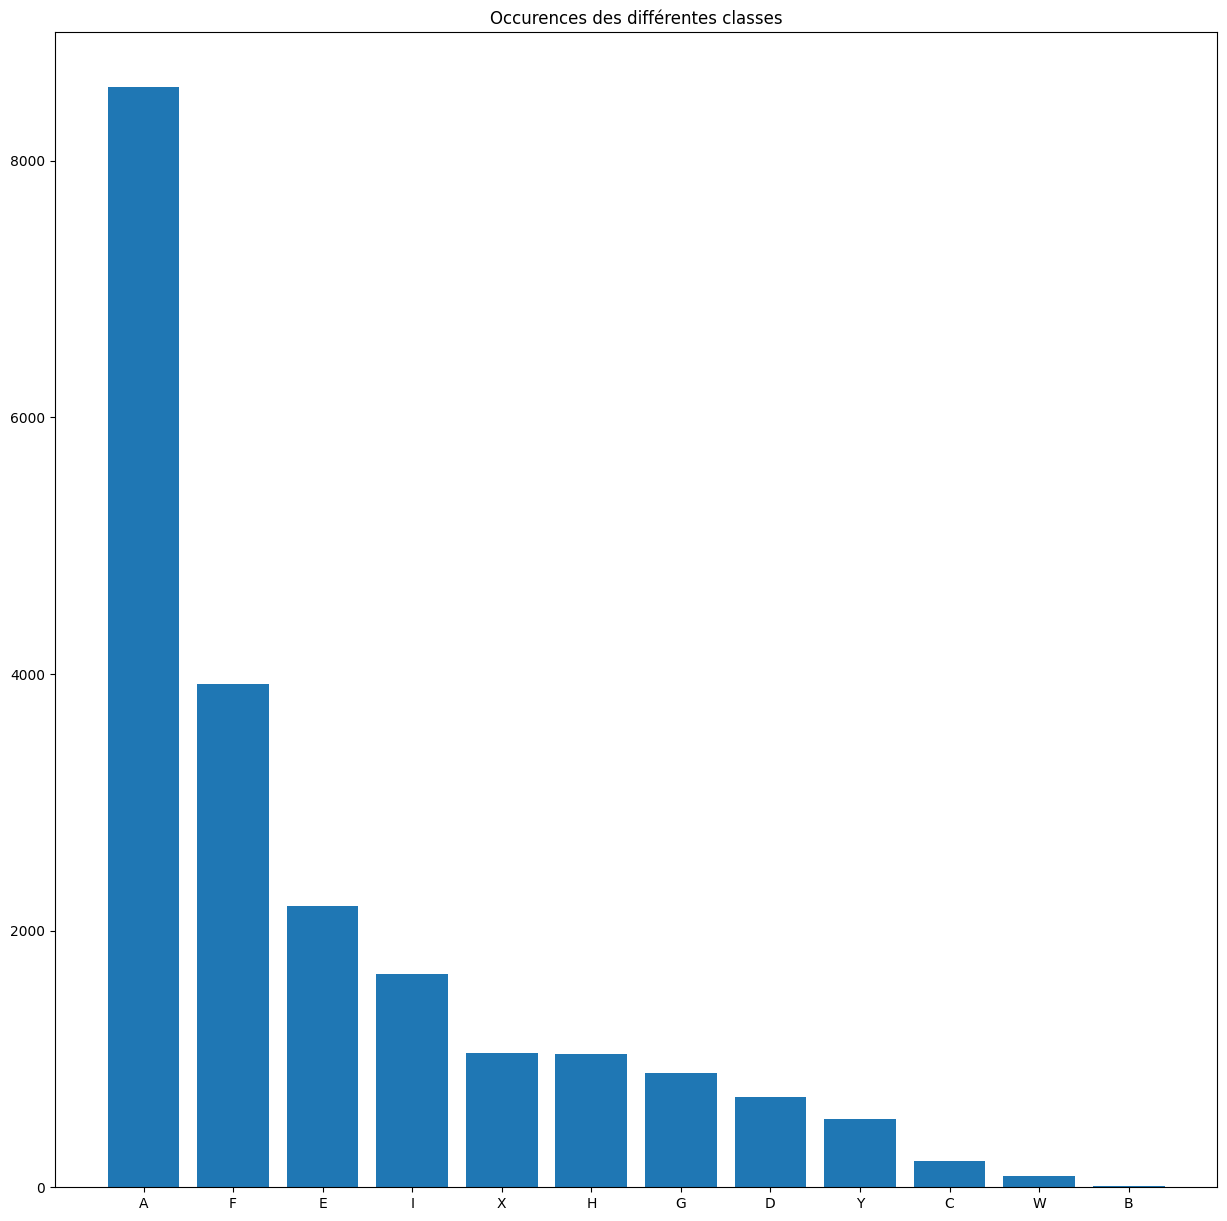

In [ ]:
plt.figure(figsize=(15,15))
plt.title("Occurences des différentes classes")
plt.bar(Occ.index,Occ)

Très forte prédominance de la classe A mais les classes suivantes sont bien fournies. Il faudra s'assurer que la faible représentation de certaines classes ne posera pas problème plus tard

In [ ]:
X = avila.drop('class', axis=1)
X

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681
...,...,...,...,...,...,...,...,...,...,...
20862,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141
20863,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134
20864,0.229043,-0.000745,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.088486,-0.590727,0.580142
20865,-0.301743,0.352558,0.288973,1.638181,0.261718,0.688613,0.069175,0.502761,0.625350,0.718969


On va utiliser X pour stocker toutes nos variables afin de travailler dessus plus en détails

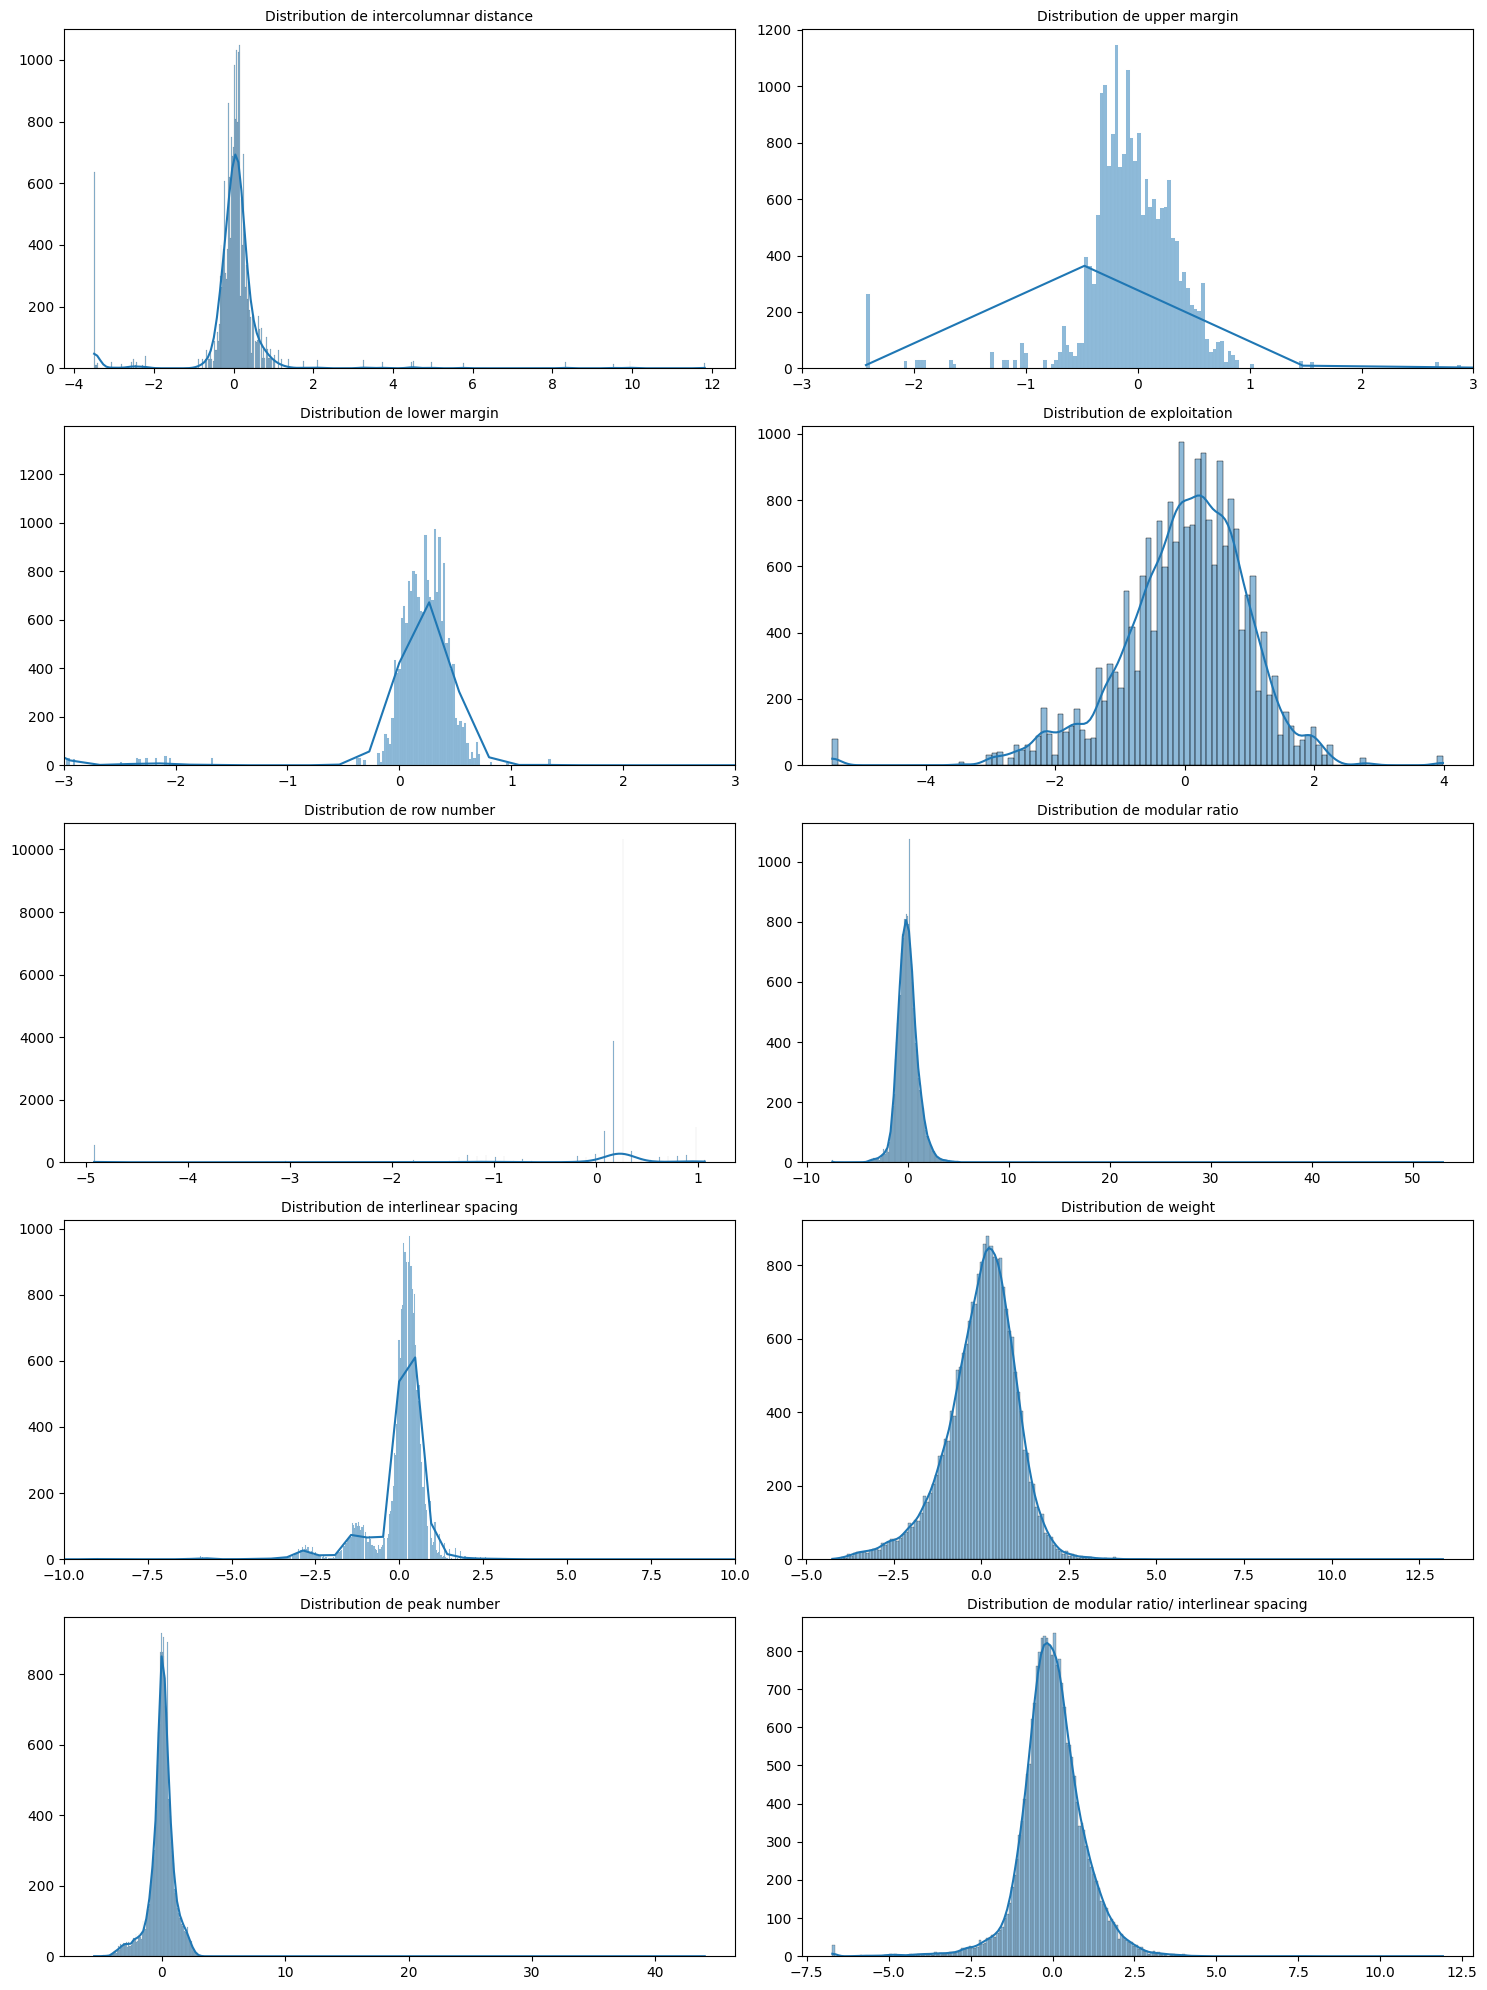

In [ ]:
import seaborn as sns

# Visualisation de la distribution des caractéristiques numériques de l'ensemble d'entraînement

# Création d'une grille de graphiques pour les histogrammes des caractéristiques numériques
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Aplatir l'array des axes pour un itérable facile
axes = axes.flatten()

# Boucle sur les caractéristiques numériques et création d'un histogramme pour chacune
for i, col in enumerate(X):

        sns.histplot(X[col], kde=True, ax=axes[i])
        if i==1:
            axes[i].set_xlim(-3, 3)
        if i==2:
            axes[i].set_xlim(-3,3)
        if i==6:
            axes[i].set_xlim(-10, 10)
        axes[i].set_title(f'Distribution de {col}', fontsize=10)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')


# Ajustement de la mise en page pour éviter le chevauchement
plt.tight_layout()

# Affichage des graphiques
plt.show()


 intercolmunal semble binomial
sinon plutot des lois normales
On peut se questionner sur la pertincence de "row number" qui sont uniquement quelques valeurs uniques et ne semblent pas apporter d'informations pertinentes dans notre dataset.


correlation entre colonnes et class finale

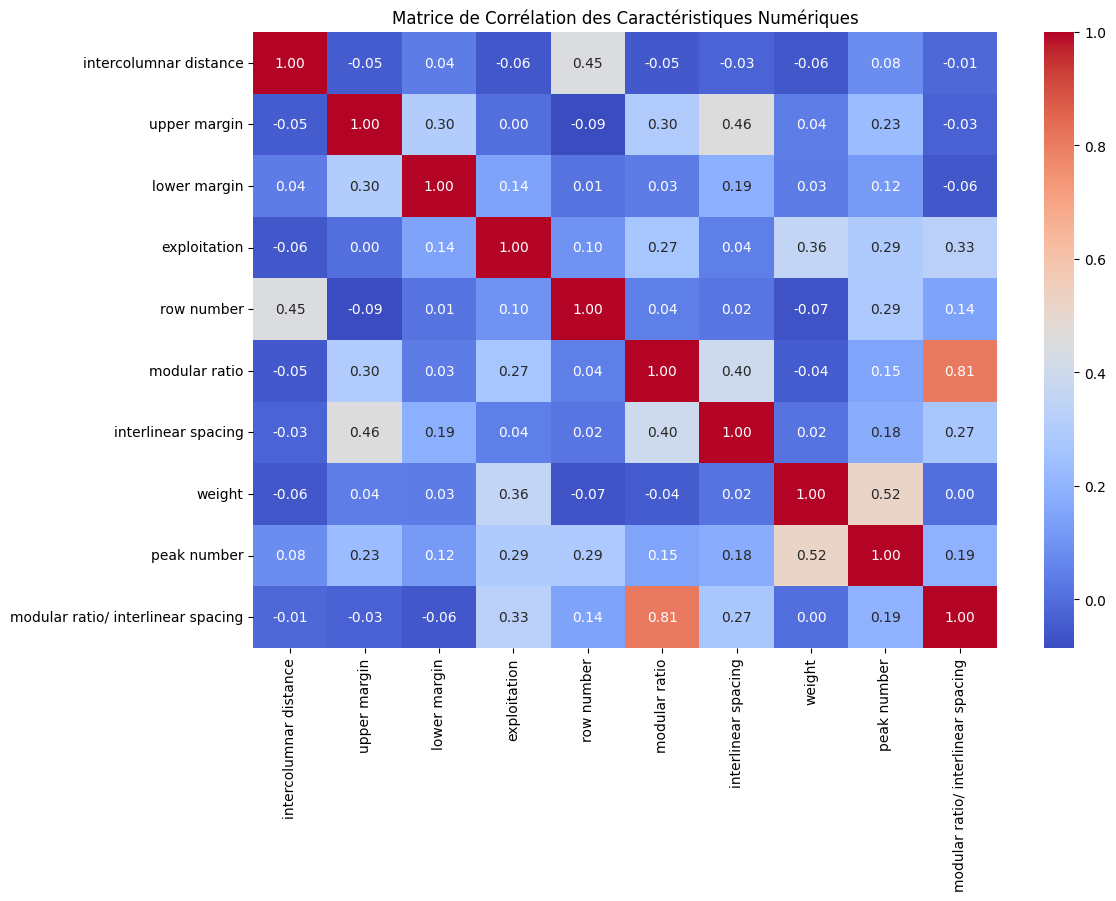

In [ ]:
# Calcul de la matrice de corrélation pour l'ensemble d'entraînement
correlation_matrix_train = X.corr()

# Création d'une figure pour la heatmap de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_train, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de Corrélation des Caractéristiques Numériques')
plt.show()



Les variables sont peu corrélées ce qui est un bon point, on a peu de répétitions de l'information. Sauf pour la variable "modular ratio/ interlinear spacing" qui est par définition une répétition de 2 classes que l'on à déjà. On va décidé de ne pas conserver cette variable car elle est redondante.

In [ ]:
X = X.drop('modular ratio/ interlinear spacing', axis=1)
X = X.drop('row number', axis=1)

# Model Training


Here we will apply several model that match our goal to find the one that predict the most effectibly our tagert class


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Liste des modèles à évaluer
models = [
    ('Multinomial Logistic Regression', LogisticRegression(max_iter=10000, solver='saga', tol=1e-3, multi_class='multinomial')),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('KNN', KNeighborsClassifier())
]

# Définition des métriques
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Évaluation des modèles
results = {}
for name, model in models:
    cv_results = cross_validate(model, X, Y, cv=5, scoring=scoring, return_train_score=False)
    results[name] = cv_results






/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

On utilise la bibliothèque scikit-learn pour évaluer cinq modèles de machine learning différents : Régression Logistique Multinomiale, Arbre de Décision, Forêt Aléatoire, Naive Bayes et KNN (K-Plus Proches Voisins). L'évaluation se fait à l'aide de la méthode de validation croisée (cross-validation) sur cinq partitions (cv=5), ce qui permet de tester l'efficacité des modèles sur différentes portions du dataset et d'obtenir une estimation fiable de leur performance. Les métriques utilisées pour évaluer chaque modèle sont l'accuracy, la précision macro, le rappel macro et le score F1 macro.

# Régression Logistique Multinomiale :
Parfaite pour les cas de classification multinomiale. Elle modélise la probabilité d'appartenance à chaque classe et est efficace dans des scénarios où les relations entre les caractéristiques et les classes sont plus linéaires.
# Arbre de Décision :
Idéal pour capter des relations non-linéaires entre les caractéristiques. Les arbres de décision sont intuitifs et faciles à interpréter, ce qui peut être un atout dans un contexte éducatif.
# Forêt Aléatoire :
Une amélioration des arbres de décision, cette méthode d'ensemble réduit le risque de surajustement et augmente la précision, ce qui est bénéfique pour traiter des données complexes.
# Naive Bayes :
Efficace et rapide, particulièrement adapté lorsque les caractéristiques sont indépendantes, ce qui semble être le cas dans votre dataset.
# KNN :
Un modèle non paramétrique qui est utile pour trouver des groupes naturels ou des tendances au sein des données. Sa performance peut fournir des indices sur la structure spatiale des données.

In [ ]:
# Parcours des résultats pour chaque modèle
for name in results:
    print(f"Résultats pour {name}:")
    # Temps moyen d'ajustement et de score
    print(f"  Temps moyen d'ajustement: {results[name]['fit_time'].mean():.3f} secondes")
    print(f"  Temps moyen de scoring: {results[name]['score_time'].mean():.3f} secondes")
    # Performances sur les différents metrics
    print(f"  Accuracy moyenne: {results[name]['test_accuracy'].mean():.4f} (Écart-type = {results[name]['test_accuracy'].std():.4f})")
    print(f"  Precision moyenne: {results[name]['test_precision_macro'].mean():.4f} (Écart-type = {results[name]['test_precision_macro'].std():.4f})")
    print(f"  Recall moyenne: {results[name]['test_recall_macro'].mean():.4f} (Écart-type = {results[name]['test_recall_macro'].std():.4f})")
    print(f"  F1-Score moyen: {results[name]['test_f1_macro'].mean():.4f} (Écart-type = {results[name]['test_f1_macro'].std():.4f})")
    print("\n")


Résultats pour Multinomial Logistic Regression:
  Temps moyen d'ajustement: 7.484 secondes
  Temps moyen de scoring: 0.152 secondes
  Accuracy moyenne: 0.5197 (Écart-type = 0.0072)
  Precision moyenne: 0.3128 (Écart-type = 0.0414)
  Recall moyenne: 0.2650 (Écart-type = 0.0482)
  F1-Score moyen: 0.2565 (Écart-type = 0.0438)


Résultats pour Decision Tree:
  Temps moyen d'ajustement: 0.116 secondes
  Temps moyen de scoring: 0.086 secondes
  Accuracy moyenne: 0.9712 (Écart-type = 0.0061)
  Precision moyenne: 0.9371 (Écart-type = 0.0278)
  Recall moyenne: 0.9293 (Écart-type = 0.0301)
  F1-Score moyen: 0.9317 (Écart-type = 0.0271)


Résultats pour Random Forest:
  Temps moyen d'ajustement: 2.790 secondes
  Temps moyen de scoring: 0.210 secondes
  Accuracy moyenne: 0.9864 (Écart-type = 0.0021)
  Precision moyenne: 0.9901 (Écart-type = 0.0014)
  Recall moyenne: 0.9722 (Écart-type = 0.0151)
  F1-Score moyen: 0.9796 (Écart-type = 0.0100)


Résultats pour Naive Bayes:
  Temps moyen d'ajustement:

Afin de juger de la pertinence de nos modèles on a décidé de comparer plusieurs valeurs associées.
# Accuracy moyenne
Tout d'abord la

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,random_state=42)

In this part we are checking if our model are not overffiting or underffiting to the trainnig data

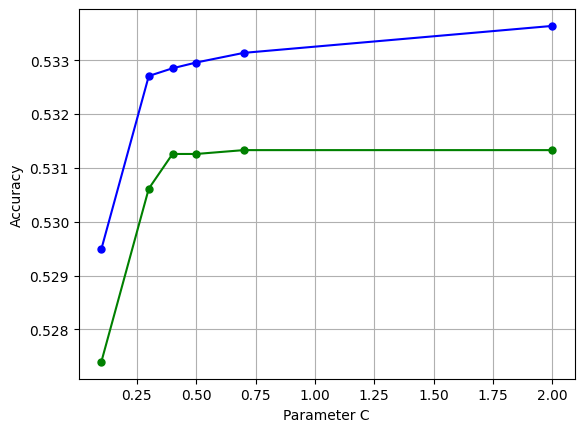

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=1))

param_range = [0.1, 0.3, 0.4, 0.5, 0.7,1,1.2,1.3,1.4,2,2.5]
train_scores, test_scores = validation_curve(estimator=pipeline,
                                             X=x_train, y=y_train,
                                             cv=5,
param_name='logisticregression__C', param_range=param_range)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.title("Validation Curve with LogisticRegression")
plt.plot(param_range, train_mean,

         color='blue', label='Training Accuracy')
plt.plot(param_range, test_mean,

         color='green', label='Validation Accuracy')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

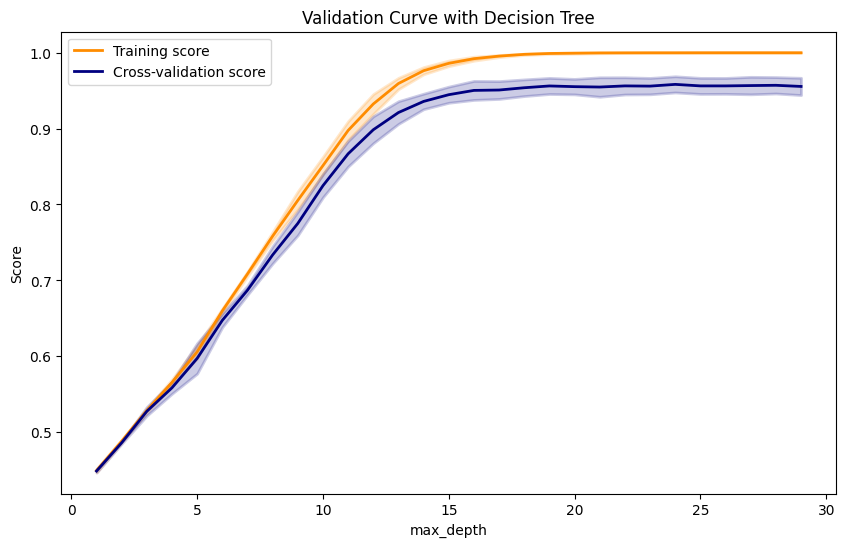

In [ ]:
param_range = np.arange(1, 30)  # Adjust the range as needed

# Create the validation curve
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), x_train, y_train, param_name="max_depth", param_range=param_range, cv=5
)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve with Decision Tree")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange", lw=2)

plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=2)

plt.legend(loc="best")
plt.show()

The training score reaches its peak around max_depth of 20, indicating that this might be the point where the model starts to overfit the training data.

So this suggests that the model is learning some relevant patterns initially but starts to overfit at higher depths

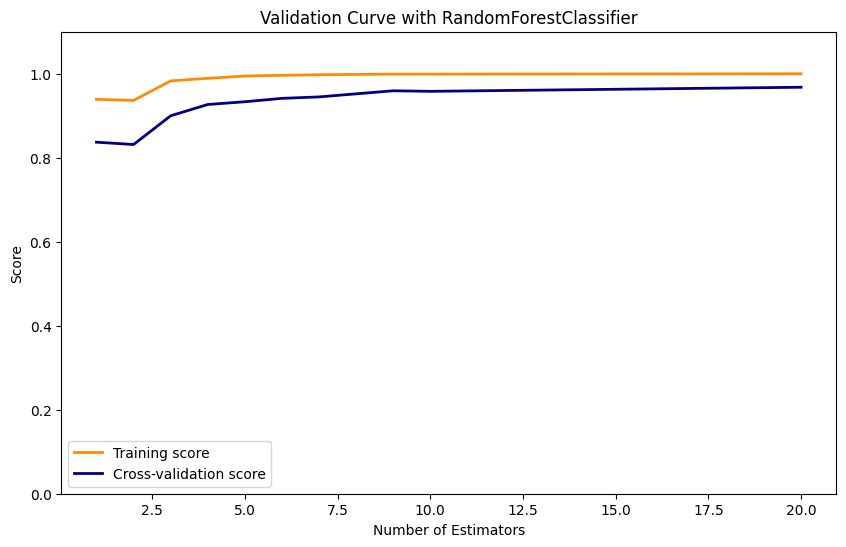

In [ ]:
param_range = [1,2,3,4,5,6,7,9,10,20]

# Use the validation_curve for classification
train_scores, test_scores = validation_curve(
    RandomForestClassifier(),  # Your classifier
    x_train, y_train,
    param_name='n_estimators',  # The parameter you want to vary
    param_range=param_range,
    cv=5,  # Number of folds in cross-validation
    scoring="accuracy"  # Scoring metric for classification
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve with RandomForestClassifier")
plt.xlabel("Number of Estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2

plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)


plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)

plt.legend(loc="best")
plt.show()

We can see that the model start to overfit at a 5 to 6 depth however because the cross validation score does not necessarily decrease, the model is not suffering from high error due to variance. so we can either let it go over or put a max depth to prevent the overfitting

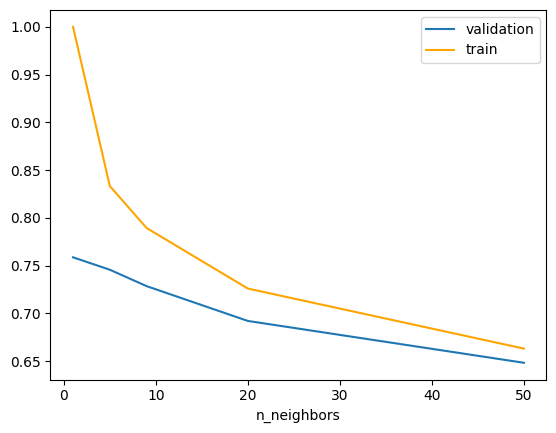

In [ ]:
model=KNeighborsClassifier()
k=np.arange(0,35)
train_scores,val_scores=validation_curve(model,x_train,y_train,param_name='n_neighbors',param_range=k,cv=5)
plt.plot(k,val_scores.mean(axis=1),label='validation')
plt.plot(k,train_scores.mean(axis=1),c='orange',label='train')
plt.title("Validation Curve with KNN")
plt.xlabel('n_neighbors')
plt.legend()

We can see that KNN overfit a lot at low number of neighbors, but it reduce significantly at higher number while retaining a good accuracy a good parameter for neighbors could be 5 or 13.

And the model is not underfitting the training data, as the validation accuracy is relatively high

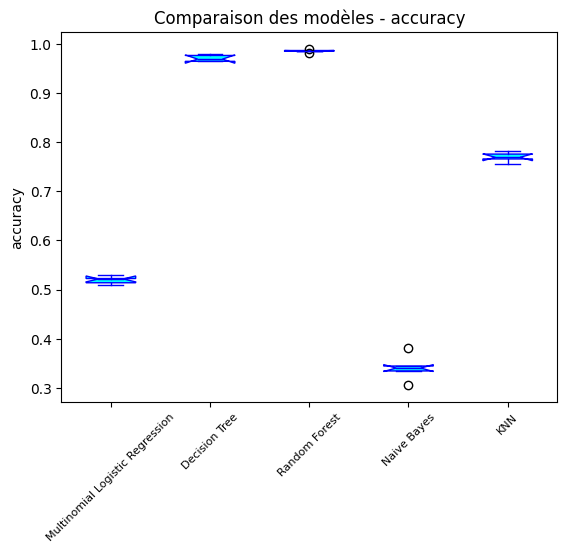

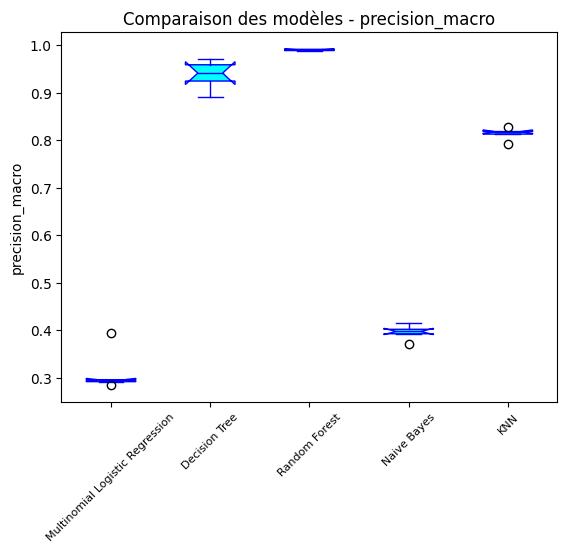

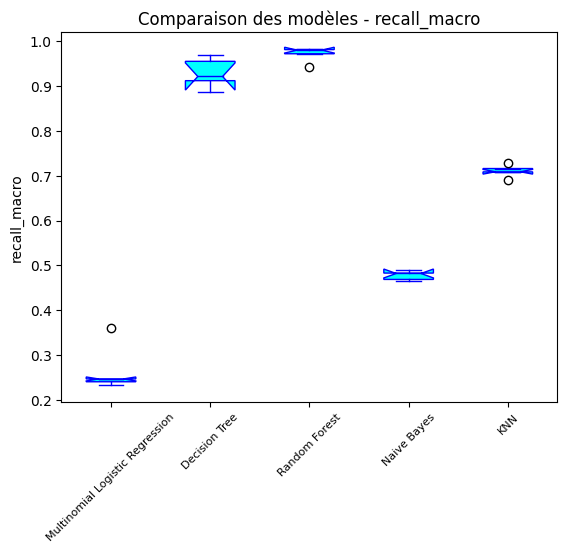

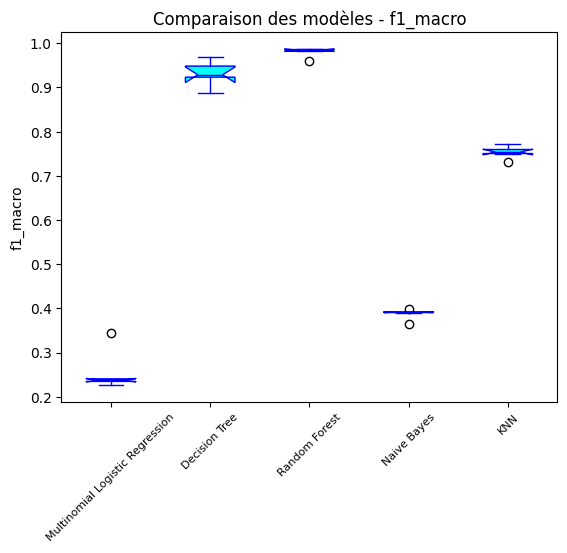

In [ ]:
import matplotlib.pyplot as plt

# Fonction pour dessiner les graphiques
def draw_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True, notch=True)
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)

# Créer des graphiques pour chaque métrique
for metric in scoring:
    fig, ax = plt.subplots()
    data = [results[name][f'test_{metric}'] for name in results]
    draw_plot(data, 'blue', 'cyan')
    ax.set_title(f'Comparaison des modèles - {metric}')
    ax.set_xticklabels(results.keys(), rotation=45, fontsize=8)
    ax.set_ylabel(metric)
    plt.show()


les modeles type arbre sont très efficaces mais ils ne semblent pas être surentrainés

here we will split the dataframe in 2 parts, one for the training and the second for the testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,random_state=42)

x_train.shape

(13980, 8)

Here we will try to optimize all the hyperparameters. For this we will use the method called "gridSearch". As it says it's a griddy way to try many different combinaisons of hyperparameter to select the best one.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings



# Création du modèle de régression logistique
model = LogisticRegression(multi_class='multinomial',max_iter=10000)

# Définition de la grille d'hyperparamètres à tester
param_grid = {
    'C': [0.1, 0.5, 1, 10],  # Valeurs pour la régularisation
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],  # Solveurs à tester (compatibles avec multinomial)
    'penalty': ['l2']  # Type de régularisation
}

# Configuration de la recherche par grille
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Exécution de la recherche par grille sur les données d'entraînement
grid_search.fit(x_train, y_train)

# Affichage des meilleurs paramètres et de la meilleure accuracy
print("Meilleurs Paramètres:", grid_search.best_params_)
print("Meilleure Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Meilleurs Paramètres: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Meilleure Accuracy: 0.5315450643776823


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Création du modèle Decision Tree
model = DecisionTreeClassifier()

# Définition de la grille d'hyperparamètres à tester
param_grid = {
    'criterion': ['gini', 'entropy'],  # Critères pour la mesure de la qualité d'une scission
    'max_depth': [None, 10, 20, 30, 40, 50],  # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons requis pour scinder un nœud
    'min_samples_leaf': [1, 2, 4]  # Nombre minimum d'échantillons requis à un nœud feuille
}

# Configuration de la recherche par grille
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Exécution de la recherche par grille sur les données d'entraînement
grid_search.fit(x_train, y_train)

# Affichage des meilleurs paramètres et de la meilleure accuracy
print("Meilleurs Paramètres:", grid_search.best_params_)
print("Meilleure Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Meilleurs Paramètres: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Meilleure Accuracy: 0.9706723891273248


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Création du modèle RandomForest
model = RandomForestClassifier()

# Définition de la grille d'hyperparamètres à tester
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Nombre d'arbres dans la forêt
    'max_features': ['auto', 'sqrt', 'log2'],  # Nombre de fonctionnalités à considérer pour chaque scission
    'max_depth': [None, 10, 20, 30, 40, 50],  # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons requis pour scinder un nœud
    'min_samples_leaf': [1, 2, 4],  # Nombre minimum d'échantillons requis à un nœud feuille
    'bootstrap': [True, False]  # Méthode pour échantillonner les données (avec ou sans remplacement)
}

# Configuration de la recherche par grille
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Exécution de la recherche par grille sur les données d'entraînement
grid_search.fit(x_train, y_train)

# Affichage des meilleurs paramètres et de la meilleure accuracy
print("Meilleurs Paramètres:", grid_search.best_params_)
print("Meilleure Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Création du modèle GaussianNB
model = GaussianNB()

# Définition de la grille d'hyperparamètres à tester
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)  # Ajout d'une portion de la variance la plus élevée des fonctionnalités à la variance de chaque fonctionnalité
}

# Configuration de la recherche par grille
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Exécution de la recherche par grille sur les données d'entraînement
grid_search.fit(x_train, y_train)

# Affichage des meilleurs paramètres et de la meilleure accuracy
print("Meilleurs Paramètres:", grid_search.best_params_)
print("Meilleure Accuracy:", grid_search.best_score_)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Création du modèle KNN
knn_model = KNeighborsClassifier()

# Définition de la grille d'hyperparamètres à tester
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],  # Nombre de voisins
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Métrique de distance
    'weights': ['uniform', 'distance'],  # Poids des voisins
    'p': [1, 2]  # Paramètre de puissance pour la métrique de Minkowski
}

# Configuration de la recherche par grille
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Exécution de la recherche par grille sur les données d'entraînement
# Assurez-vous que x_train et y_train sont vos jeux de données d'entraînement
grid_search.fit(x_train, y_train)

# Affichage des meilleurs paramètres et de la meilleure accuracy
print("Meilleurs Paramètres:", grid_search.best_params_)
print("Meilleure Accuracy:", grid_search.best_score_)


Now we're going to convert our best model (the one with the highest accuracy) in pkl to feed our API

In [ ]:
import joblib
# Sauvegarder le modèle
model=RandomForestClassifier(bootstrap= "False", max_depth= 30, max_features= 'log2', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)
model.fit(x_train, y_train)
joblib.dump(model, 'model.pkl')
